In [45]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sb
import sys

(-0.5, 63.5, 63.5, -0.5)

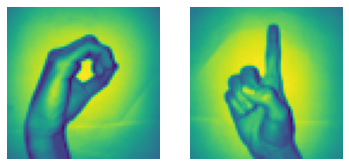

In [46]:
x_l = np.load('/content/X.npy')
Y_l = np.load('/content/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [47]:
Y_l[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [48]:
std = []
for i in range(0,len(Y_l)):
  for j in range(0,10):
    if Y_l[i,j]== 1:
      std.append(j)
std = np.array(std)


In [52]:
from sklearn.metrics import accuracy_score
numbers = [0,1,2,3,4,5,6,7,8,9]
prediction= []
y_pred = []
y_test_matris=[]
score_list=[]
for j in numbers:
  for i in numbers:
    if j != i and j<i :
      print("recognize the digits: {} to {} ".format(j,i))

      import numpy as np

      train_filter = np.where((Y_l[:,j]==1 ) | ( Y_l[:,i]== 1  ))
      X_train_two_digit= x_l[train_filter]
      y = std[train_filter]

  
      from sklearn.model_selection import train_test_split
      X_train, X_test, Y_train, Y_test = train_test_split(X_train_two_digit, y, test_size=0.25, random_state=42)
      Y_train = Y_train.reshape(Y_train.shape[0],1)
      Y_test = Y_test.reshape(Y_test.shape[0],1)

      print("The shape of the training set feature matrix is:", X_train.shape)
      print("The shape of the training label vector is:", Y_train.shape)
      print("The shape of the test set feature matrix is:", X_test.shape)
      print("The shape of the test label vector is:", Y_test.shape) 

      y_test_matris.append(Y_test)
      x_train_flat = X_train.reshape(len(X_train),(64*64))
      x_test_flat = X_test.reshape(len(X_test),(64*64))

      from sklearn import linear_model
      logreg = linear_model.LogisticRegression(solver='lbfgs', max_iter=500)
  
      logreg.fit(x_train_flat, Y_train)
      prediction.append(logreg.predict(x_test_flat))
      y_pred.append(Y_test)
      print("Accuracy: {} ".format(logreg.score(x_test_flat, Y_test)))
      print('-'*60)
      score_list.append(logreg.score(x_test_flat, Y_test))
  y_predicted_labels = [i for i in prediction]
      

recognize the digit: 0 to 1 
The shape of the training set feature matrix is: (347, 64, 64)
The shape of the training label vector is: (347, 1)
The shape of the test set feature matrix is: (62, 64, 64)
The shape of the test label vector is: (62, 1)
Accuracy: 0.9516129032258065 
------------------------------------------------------------
recognize the digit: 0 to 2 
The shape of the training set feature matrix is: (348, 64, 64)
The shape of the training label vector is: (348, 1)
The shape of the test set feature matrix is: (62, 64, 64)
The shape of the test label vector is: (62, 1)
Accuracy: 0.9838709677419355 
------------------------------------------------------------
recognize the digit: 0 to 3 
The shape of the training set feature matrix is: (349, 64, 64)
The shape of the training label vector is: (349, 1)
The shape of the test set feature matrix is: (62, 64, 64)
The shape of the test label vector is: (62, 1)
Accuracy: 0.9354838709677419 
-----------------------------------------